<a href="https://colab.research.google.com/github/Suraj945gh/Antariksh/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('Salary_dataset.csv')

In [11]:
df.shape

(30, 3)

In [12]:
df = df.reset_index(drop=True)
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [13]:
df.tail()

,Unnamed: 0,YearsExperience,Salary
25,25,9.1,105583.0
26,26,9.6,116970.0
27,27,9.7,112636.0
28,28,10.4,122392.0
29,29,10.6,121873.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [15]:
df.drop('Unnamed: 0',axis=1 , inplace = True)
# drop (labels , axis , inplace)

In [16]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [17]:
df.head(3)

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0


# *Data Cleaning :*

In [18]:
df.isnull().sum()
# har column mai if null values hai , then unka sum batana is the work of this func

YearsExperience    0
Salary             0
dtype: int64

In [19]:
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [20]:
df.duplicated().sum()
# Gives the sum of duplicated rows if any in the dataset
# If duplicate rows exists , then we could use df.drop_duplicates() to remove them

0

# *Exploratory Data Analysis (EDA )*

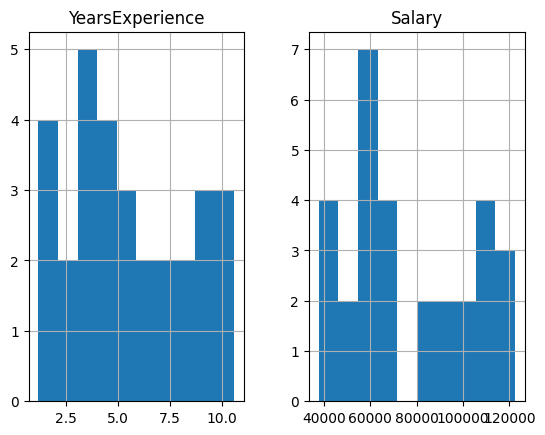

In [21]:
df.hist()   # Generates histograms for columns
# If I want only Salary ka histogram , then I'll write : df.hist['Salary'].hist()
plt.show()

A correlation matrix is a statistical technique used to evaluate the relationship between two variables in a data set. The matrix is a table in which every cell contains a correlation coefficient, where 1 is considered a strong relationship between variables, 0 a neutral relationship and -1 a not strong relationship.

In [22]:
correlation_matrix = df.corr()
# df.corr() function is used to compute the pairwise correlation of columns in a DataFrame.
print(correlation_matrix)
# The output shows a correlation matrix where each cell represents the correlation coefficient between two columns.

                 YearsExperience    Salary
YearsExperience         1.000000  0.978242
Salary                  0.978242  1.000000


 Scatter Plots help to explain the values and how they are scattered


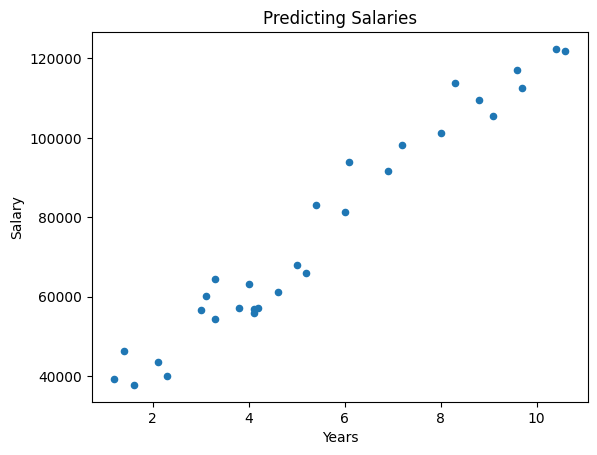

In [23]:
df.plot.scatter( x ='YearsExperience' , y = 'Salary' )
plt.xlabel('Years')
plt.title('Predicting Salaries')
plt.show()

<Axes: title={'center': 'YearsExperience'}, xlabel='Salary'>

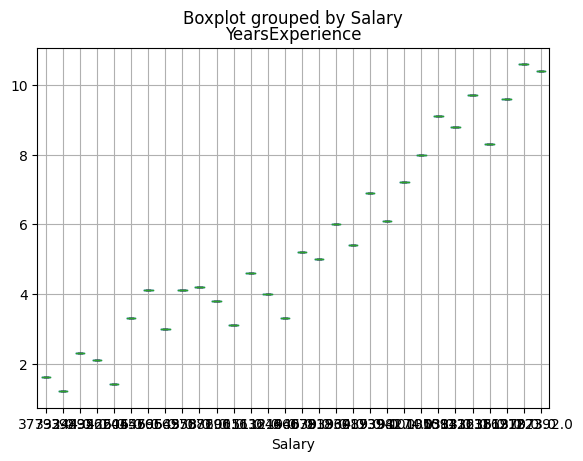

In [24]:
df.boxplot(column = 'YearsExperience' , by = 'Salary')

# *Data Preprocessing*

We could do some conversion of categorical values if any by using get_dummies() function. It is used to convert categorical variables into dummy/indicator variables. It creates a new DataFrame with binary columns for each category present in the original column.But since here we don't have categorical values repeating , we won't do it

> Eg : df = pd.get_dummies(df, columns=['categorical_column'])


In [25]:
# Split the data into features(input variables) and target variable
# x = df[['feature1', 'feature2', ...]]
# y = df['target_variable']

x = df['YearsExperience']   # we've only 1 feature
y = df['Salary']            # yeh output mai hame chahiye

In [50]:
# The primary purpose of the train-test split function is to assess how well your machine learning model generalizes to new, unseen data. Think of it as a practice test before the real exam
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split( x,y,test_size = 0.4 , random_state = 42 )
# Training 40% of data for testing purpose , so definitely 60% for training

In [51]:
# Create new axis for x column
x_train = x_train[:,np.newaxis]
x_test = x_test[:,np.newaxis]

<ipython-input-51-86ec15273d70>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_train = x_train[:,np.newaxis]
<ipython-input-51-86ec15273d70>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_test = x_test[:,np.newaxis]


The above thing is used to change the shape of your training and testing feature matrices from 1D arrays to 2D arrays with an additional axis. This operation is often needed when working with certain machine learning libraries or algorithms that expect data to be in a particular shape.

# *Model Building*

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
mymodel = LinearRegression()

In [54]:
# mymodel.reshape(-1, 1)
mymodel.fit(x_train , y_train)

LinearRegression()

In [55]:
y_pred = mymodel.predict(x_test)

In [56]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print("Mean absolute error of our model : ", mean_absolute_error(y_test , y_pred))
print("Mean square error of our model : ", mean_squared_error(y_test , y_pred))
print("R2 Score : ",r2_score(y_test , y_pred))

Mean absolute error of our model :  5349.257075540302
Mean square error of our model :  37867393.388939455
R2 Score :  0.9532338376280692


0.9532 is a good r2 score , our model is doing good !

>The R-squared (R2) score is a statistical measure that represents the proportion of the variance in the dependent variable that can be predicted from the independent variables in a regression model. It ranges from 0 to 1, where 0 indicates that the model does not explain any of the variability in the dependent variable, and 1 indicates that the model explains all the variability. A good r2 score depends , but a score above 0.7 and 0.8 is considered good.



In [57]:
# Building equation of our ml model
print("Intercept of our model : ",mymodel.intercept_)
print("Coefficient of our model : ", mymodel.coef_)

Intercept of our model :  25879.113578471923
Coefficient of our model :  [9284.87835182]


# *Conclusion*

Equation of our model : **y = 9285x + 25879**


> Our model is working with 95% of accuracy


* R2 score is used in regression to measure how well the model fits the data.


* Accuracy is used in classification to measure the percentage of correctly classified instances.
* These metrics are different and should be used in their respective contexts. An R2 score of 0.95 in regression indicates that the model explains 95% of the variance in the target variable, not that it has 95% accuracy in predicting discrete classes.



